# Dataset Bug Detection

In this example, we will demonstrate how to detect bugs in a data set using the public Airlines data set.

In [1]:
import pandas
pandas.options.display.max_rows=5 # restrict to 5 rows on display

df = pandas.read_csv("https://raw.githubusercontent.com/Devvrat53/Flight-Delay-Prediction/master/Data/flight_data.csv")
df['date'] = pandas.to_datetime(df[['year', 'month', 'day']])
df['day_index'] = (df['date'] - df['date'].min()).dt.days
df['DayOfWeek'] = df['date'].dt.day_name()
df['Month'] = df['date'].dt.month_name()
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,date,day_index,DayOfWeek,Month
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,1/1/2013 5:00,2013-01-01,0,Tuesday,January
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,1/1/2013 5:00,2013-01-01,0,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,CLE,NaN,419,11,59,30-09-2013 11:00,2013-09-30,272,Monday,September
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,...,RDU,NaN,431,8,40,30-09-2013 08:00,2013-09-30,272,Monday,September


## Prepare daily data

Let's assume that we run new data each day through our model. For simplicity we will just look at the last 10 days of data.

In [2]:
df_daily = df[df['month'] > 11]

In [3]:
df_daily = df_daily[df_daily['day'] > 20]

In [4]:
df_daily

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,date,day_index,DayOfWeek,Month
101780,2013,12,21,2.0,2359,3.0,445.0,445,0.0,B6,...,PSE,206.0,1617,23,59,21-12-2013 23:00,2013-12-21,354,Saturday,December
101781,2013,12,21,29.0,2040,229.0,138.0,2220,198.0,WN,...,MDW,117.0,725,20,40,21-12-2013 20:00,2013-12-21,354,Saturday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,...,ORD,NaN,719,6,0,31-12-2013 06:00,2013-12-31,364,Tuesday,December
111295,2013,12,31,NaN,830,NaN,NaN,1154,NaN,UA,...,LAX,NaN,2475,8,30,31-12-2013 08:00,2013-12-31,364,Tuesday,December


## Bug Detection

Now we want to find any bugs in any of our daily sets of data that we feed to our model.

In [5]:
import category_encoders as ce
from mvtk.supervisor.utils import compute_divergence_crosstabs
from mvtk.supervisor.divergence import calc_tv_knn

columns = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'air_time', 'distance', 'hour', 'minute', 'carrier', 'origin', 'dest']

encoder = ce.BinaryEncoder(cols=['carrier', 'origin', 'dest'])
encoder.fit(df_daily[columns + ['day']])
df_daily_encoded = encoder.transform(df_daily[columns + ['day']].fillna(0))

f = lambda x, y: calc_tv_knn(x, y, k = 26)
                             #categorical_columns=column_indexes(df_daily[columns], cols=['carrier', 'origin', 'dest']))
result = compute_divergence_crosstabs(df_daily_encoded, datecol='day', divergence=f)

0it [00:00, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

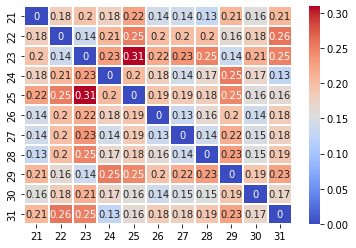

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(result, cmap='coolwarm', linewidths=0.30, annot=True)
plt.show()

As you can see from the heatmap above, although there are some divergences between the days, there is nothing that is too alarming.

Let's now update our data set to contain a "bug" in the "sched_dep_time" feature. For day 30, all of the values of that feature are null (which we are then translating to 0).

In [7]:
df_daily.loc[df_daily['day'] == 30, ['sched_dep_time']] = None

Below is the percentage of scheduled departure times that are empty per day in our updated daily data set

In [8]:
day = 21
for df_day in df_daily.groupby('day'):
    day_pct = df_day[1]['sched_dep_time'].value_counts(normalize=True, dropna=False) * 100
    pct = day_pct.loc[day_pct.index.isnull()].values
    if (len(pct) == 0):
        pct = 0
    else:
        pct = pct[0]
    print('Day ' + str(day) + ': ' + str(round(pct)) + '%')
    day += 1

Day 21: 0%
Day 22: 0%
Day 23: 0%
Day 24: 0%
Day 25: 0%
Day 26: 0%
Day 27: 0%
Day 28: 0%
Day 29: 0%
Day 30: 100%
Day 31: 0%


In [9]:
from mvtk.supervisor.divergence import calc_tv_knn

encoder = ce.BinaryEncoder(cols=['carrier', 'origin', 'dest'])
encoder.fit(df_daily[columns + ['day']])
df_daily_encoded = encoder.transform(df_daily[columns + ['day']].fillna(0))

f = lambda x, y: calc_tv_knn(x, y, k = 26)
result = compute_divergence_crosstabs(df_daily_encoded, datecol='day', divergence=f)

0it [00:00, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

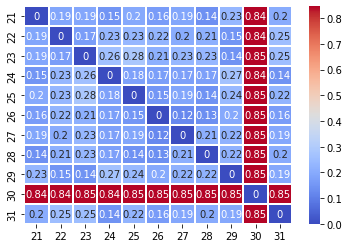

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(result, cmap='coolwarm', linewidths=0.30, annot=True)
plt.show()

As we can see above, our heatmap now clearly shows that we have a "bug" in our day 30 dataset.